# Customer Data Analysis (Task 2)

#### Revision (2)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('dataset_nan (1).csv')

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data.isnull().sum()

customerID            0
gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [12]:
data.shape

(7043, 21)

In [28]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [43]:
data['TotalCharges'].value_counts().sort_values().tail(10)

19.45       6
20.15       6
19.55       7
45.30       7
19.90       8
19.65       8
20.05       8
19.75       9
20.20      11
2283.30    12
Name: TotalCharges, dtype: int64

In [46]:
data['MonthlyCharges'].value_counts().sort_values().tail(20)

20.40    30
20.45    31
19.40    31
19.50    32
20.20    35
20.10    37
19.60    37
19.80    38
20.35    38
20.25    39
19.75    39
20.15    40
19.55    40
19.65    43
19.70    43
20.00    43
19.90    44
19.95    44
19.85    45
20.05    61
Name: MonthlyCharges, dtype: int64

In [49]:
data['tenure'].value_counts().sort_values().tail(20)

18.0     97
67.0     98
11.0     99
15.0     99
68.0    100
13.0    109
6.0     110
10.0    116
12.0    117
70.0    119
9.0     119
8.0     123
7.0     131
5.0     133
71.0    170
4.0     176
3.0     200
2.0     238
72.0    362
1.0     477
Name: tenure, dtype: int64

In [29]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [30]:
data.groupby(['Contract']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Contract,,,,
Month-to-month,0.209665,18.637457,66.398490,1369.254581
One year,0.129781,42.185286,65.048608,3034.172980
Two year,0.085951,57.071810,60.770413,3720.405133


In [50]:
data.groupby(['Contract']).std()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Contract,,,,
Month-to-month,0.407122,17.701433,26.926599,1613.879008
One year,0.336178,18.915116,31.840539,2229.058541
Two year,0.280375,17.729130,34.678865,2566.043071


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

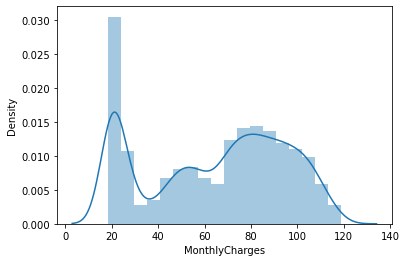

In [51]:
sns.distplot(data['MonthlyCharges'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

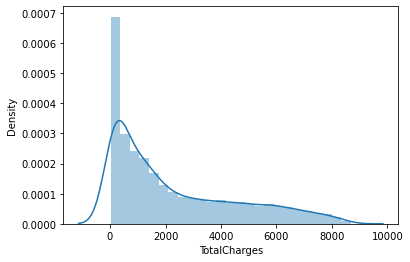

In [52]:
sns.distplot(data['TotalCharges'])

In [58]:
x=np.log(data['TotalCharges'])
x

0       3.396185
1       7.544068
2       4.683519
3       7.517928
4       5.021575
          ...   
7038    7.596141
7039    8.904209
7040    5.847739
7041    5.725544
7042    8.831201
Name: TotalCharges, Length: 7043, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

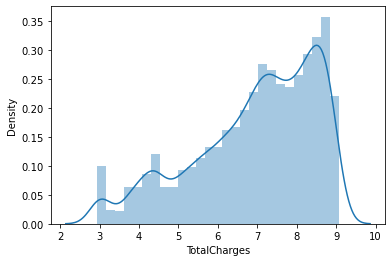

In [59]:
sns.distplot(x)

In [61]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.013521,0.221101,0.102831
tenure,0.013521,1.000000,0.238635,0.822171
MonthlyCharges,0.221101,0.238635,1.000000,0.650468
TotalCharges,0.102831,0.822171,0.650468,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

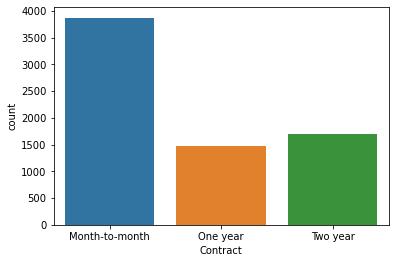

In [62]:
sns.countplot(data['Contract'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


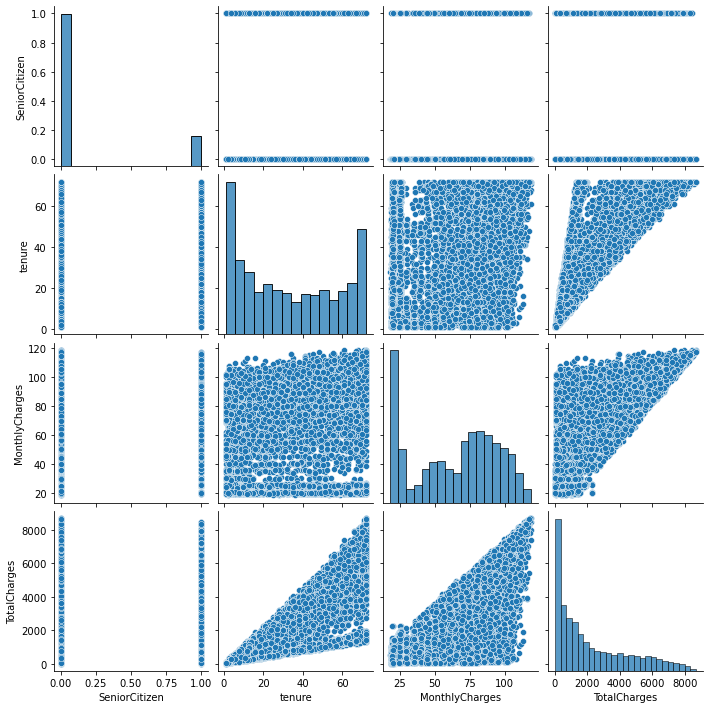

In [74]:
sns.pairplot(data, size=2.5)
plt.show();

In [85]:
df=data.groupby(['gender','Contract','StreamingTV']).sum()
df

SeniorCitizen   tenure  \
gender Contract       StreamingTV                                   
Female Month-to-month No                           218.0  16492.0   
                      No internet service            7.0   2592.0   
                      Yes                          174.0  15462.0   
       One year       No                            23.0   9637.0   
                      No internet service            6.0   5094.0   
                      Yes                           72.0  15744.0   
       Two year       No                            14.0   7847.0   
                      No internet service            8.0  15473.0   
                      Yes                           46.0  24073.0   
Male   Month-to-month No                           218.0  16727.0   
                      No internet service            5.0   2152.0   
                      Yes                          185.0  16335.0   
       One year       No                            31.0  10112.0   
                      No internet service           10.0   5676.0   
                      Yes                           48.0  15665.0   
       Two year       No                            14.0   9316.0   
                      No internet service           16.0  15587.0   
                      Yes                           47.0  23870.0   

                                           MonthlyCharges  TotalCharges  
gender Contract       StreamingTV                                        
Female Month-to-month No                         66951.55    1154480.40  
                      No internet service         5225.85      54220.25  
                      Yes                        56128.90    1397275.15  
       One year       No                         14964.45     663014.05  
                      No internet service         3490.20     107882.60  
                      Yes                        29537.65    1477329.25  
       Two year       No                          9275.40     544931.60  
                      No internet service         7053.65     344740.85  
                      Yes                        34804.75    2219896.55  
Male   Month-to-month No                         66348.05    1166864.15  
                      No internet service         5468.75      44952.50  
                      Yes                        57171.05    1488069.05  
       One year       No                         15150.35     691204.65  
                      No internet service         4088.10     121039.00  
                      Yes                        28585.85    1408867.25  
       Two year       No                         11049.60     656548.95  
                      No internet service         6840.30     351999.50  
                      Yes                        33982.15    2187969.25

In [89]:
df=data.groupby(['gender','Contract','InternetService']).mean()
df

SeniorCitizen     tenure  \
gender Contract       InternetService                             
Female Month-to-month DSL                   0.129195  16.988034   
                      Fiber optic           0.297170  21.047801   
                      No                    0.027344  10.800000   
       One year       DSL                   0.083032  39.660650   
                      Fiber optic           0.263736  52.728938   
                      No                    0.036364  30.502994   
       Two year       DSL                   0.075410  59.378289   
                      Fiber optic           0.175355  65.112676   
                      No                    0.024691  47.904025   
Male   Month-to-month DSL                   0.133117  15.736395   
                      Fiber optic           0.304265  22.937380   
                      No                    0.018797   8.747967   
       One year       DSL                   0.093750  41.407534   
                      Fiber optic           0.196226  51.451128   
                      No                    0.051020  29.409326   
       Two year       DSL                   0.084639  59.846395   
                      Fiber optic           0.158140  65.254630   
                      No                    0.051118  50.280645   

                                       MonthlyCharges  TotalCharges  
gender Contract       InternetService                                
Female Month-to-month DSL                   50.615698    885.677990  
                      Fiber optic           86.794564   1891.825117  
                      No                    20.413477    211.797852  
       One year       DSL                   62.285612   2494.652158  
                      Fiber optic           99.584982   5299.743590  
                      No                    20.899401    646.003593  
       Two year       DSL                   70.843344   4264.237987  
                      Fiber optic          104.508920   6814.285681  
                      No                    21.770525   1064.014969  
Male   Month-to-month DSL                   49.835427    776.099919  
                      Fiber optic           87.249105   2048.044439  
                      No                    20.405784    167.733209  
       One year       DSL                   60.550514   2556.429966  
                      Fiber optic           97.952820   5088.700564  
                      No                    20.751777    614.411168  
       Two year       DSL                   70.096875   4263.484375  
                      Fiber optic          104.633102   6852.792593  
                      No                    21.784395   1121.017516

In [91]:
df=data.groupby(['gender','Contract','PaymentMethod']).mean()
df         

SeniorCitizen     tenure  \
gender Contract       PaymentMethod                                         
Female Month-to-month Bank transfer (automatic)       0.172078  25.091803   
                      Credit card (automatic)         0.197761  24.525926   
                      Electronic check                0.278261  17.765816   
                      Mailed check                    0.088942  10.794937   
       One year       Bank transfer (automatic)       0.160622  46.165803   
                      Credit card (automatic)         0.147208  46.469388   
                      Electronic check                0.203704  46.814815   
                      Mailed check                    0.049080  29.355422   
       Two year       Bank transfer (automatic)       0.098592  61.904930   
                      Credit card (automatic)         0.099644  59.542254   
                      Electronic check                0.086420  60.493827   
                      Mailed check                    0.025773  41.895288   
Male   Month-to-month Bank transfer (automatic)       0.212996  25.480000   
                      Credit card (automatic)         0.210332  23.640741   
                      Electronic check                0.279956  19.366404   
                      Mailed check                    0.074310  10.559091   
       One year       Bank transfer (automatic)       0.174359  45.873737   
                      Credit card (automatic)         0.095000  44.731343   
                      Electronic check                0.162162  45.864130   
                      Mailed check                    0.035503  29.404762   
       Two year       Bank transfer (automatic)       0.100719  61.737410   
                      Credit card (automatic)         0.119048  60.263514   
                      Electronic check                0.126437  61.689655   
                      Mailed check                    0.015957  45.679348   

                                                 MonthlyCharges  TotalCharges  
gender Contract       PaymentMethod                                            
Female Month-to-month Bank transfer (automatic)       70.094355   1883.260968  
                      Credit card (automatic)         68.736481   1845.695556  
                      Electronic check                74.510572   1408.485491  
                      Mailed check                    45.327512    521.916388  
       One year       Bank transfer (automatic)       67.863472   3311.482383  
                      Credit card (automatic)         71.164213   3553.013198  
                      Electronic check                79.819136   3973.195370  
                      Mailed check                    47.859036   1599.449096  
       Two year       Bank transfer (automatic)       64.880877   4179.465088  
                      Credit card (automatic)         64.407368   4005.764561  
                      Electronic check                81.613580   5082.524074  
                      Mailed check                    39.566753   1881.928351  
Male   Month-to-month Bank transfer (automatic)       67.964337   1892.105376  
                      Credit card (automatic)         66.632784   1766.514286  
                      Electronic check                75.470477   1534.443933  
                      Mailed check                    46.685895    575.659263  
       One year       Bank transfer (automatic)       67.114394   3314.492424  
                      Credit card (automatic)         64.844030   3165.395771  
                      Electronic check                78.461351   3748.259730  
                      Mailed check                    40.857602   1375.256140  
       Two year       Bank transfer (automatic)       65.149821   4138.369355  
                      Credit card (automatic)         64.436318   4106.247973  
                      Electronic check                86.870115   5450.290805  
                      Mailed check            

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

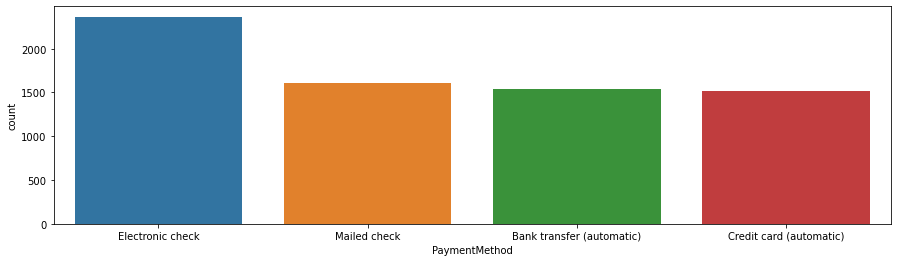

In [100]:
plt.figure(figsize=(15,4))
sns.countplot(data['PaymentMethod'])

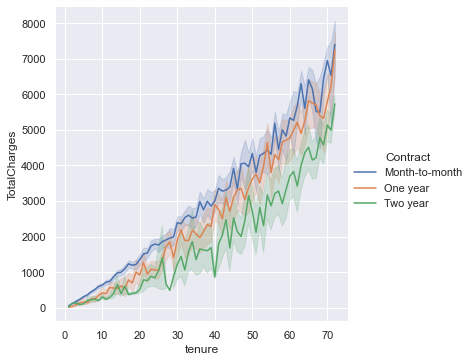

In [23]:
sns.relplot(hue=data['Contract'], x=data['tenure'], y=data['TotalCharges'], kind="line", data=data)

## The contract that company make more profite is Month-to-month contract

<AxesSubplot:xlabel='gender', ylabel='Count'>

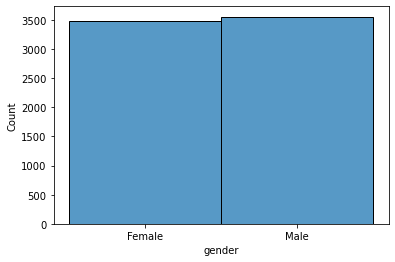

In [106]:
sns.histplot(data['gender'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

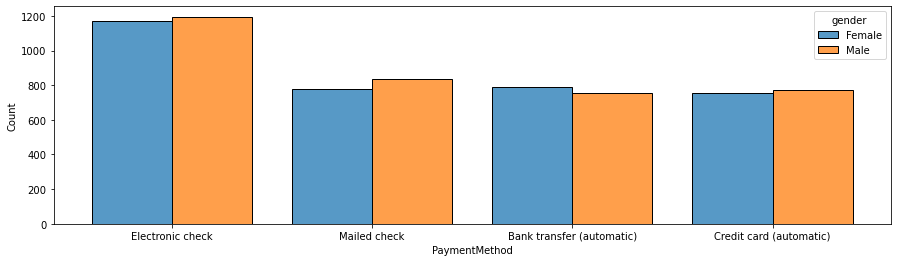

In [109]:
plt.figure(figsize=(15,4))
sns.histplot(data=data, x=data['PaymentMethod'], hue=data['gender'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

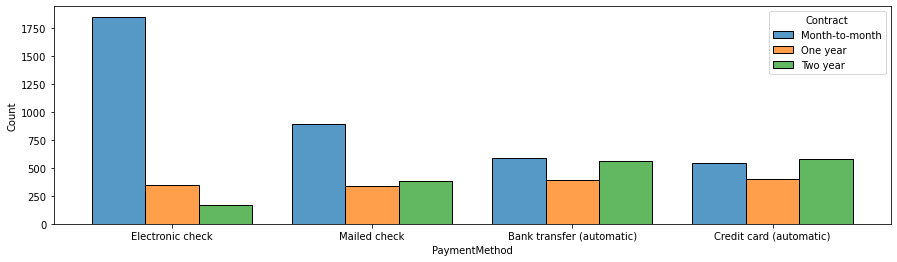

In [110]:
plt.figure(figsize=(15,4))
sns.histplot(data=data, x=data['PaymentMethod'], hue=data['Contract'], multiple="dodge", shrink=.8)

## From the above table the {Month-to-month} contract is the most contract used with [Electronic check] method

<AxesSubplot:xlabel='Contract', ylabel='Count'>

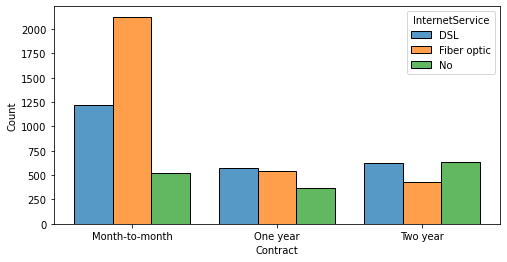

In [113]:
plt.figure(figsize=(8,4))
sns.histplot(data=data, x=data['Contract'], hue=data['InternetService'], multiple="dodge", shrink=.8)OnlineSecurity

<AxesSubplot:xlabel='InternetService', ylabel='Count'>

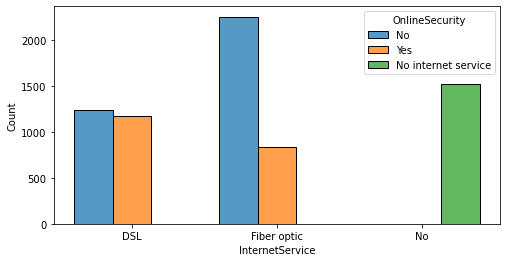

In [117]:
plt.figure(figsize=(8,4))
sns.histplot(data=data, x=data['InternetService'], hue=data['OnlineSecurity'], multiple="dodge", shrink=.8)

## As showing above graph, about half the DSL servises are online secured while the Fiber optic service is most of it have no security

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

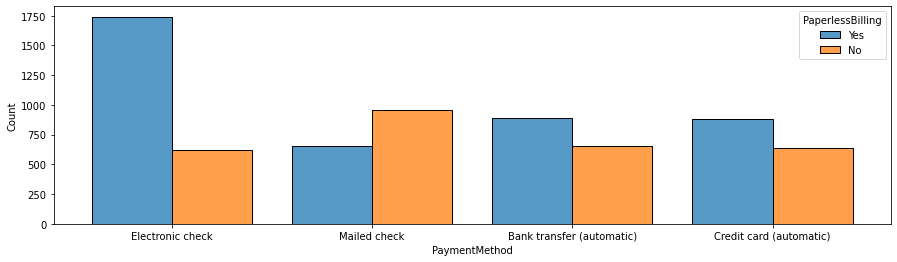

In [118]:
plt.figure(figsize=(15,4))
sns.histplot(data=data, x=data['PaymentMethod'], hue=data['PaperlessBilling'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Contract', ylabel='Count'>

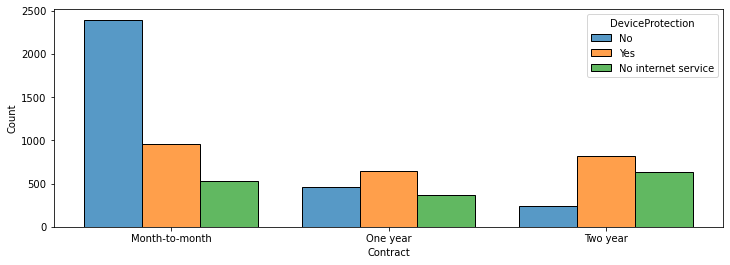

In [127]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['Contract'], hue=data['DeviceProtection'], multiple="dodge", shrink=.8)

## Mailed check are the only methode has less paperlessBilling

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

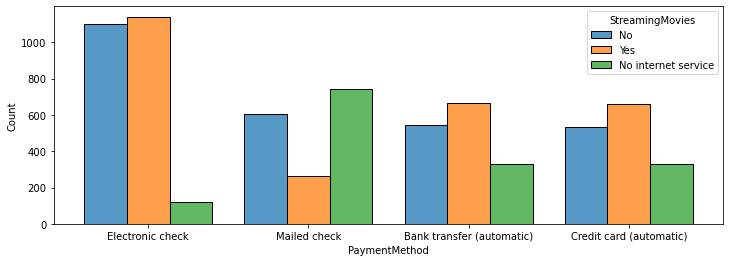

In [121]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['PaymentMethod'], hue=data['StreamingMovies'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Contract', ylabel='Count'>

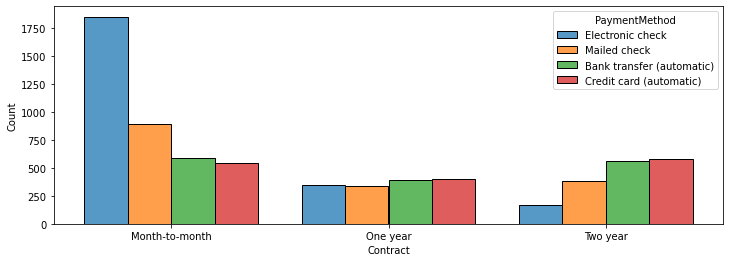

In [205]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['Contract'], hue=data['PaymentMethod'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Contract', ylabel='Count'>

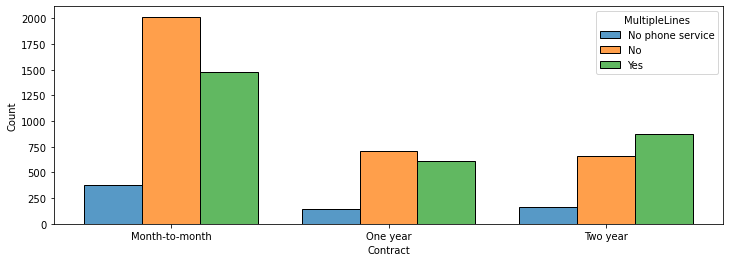

In [126]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['Contract'], hue=data['MultipleLines'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Contract', ylabel='Count'>

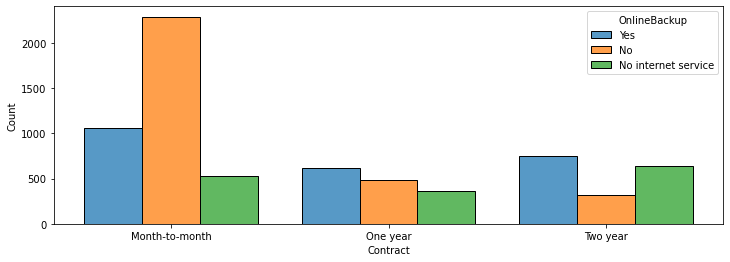

In [189]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['Contract'], hue=data['OnlineBackup'], multiple="dodge", shrink=.8)

## Month-to-month payment method need to inhance the online backup

<AxesSubplot:xlabel='tenure', ylabel='Count'>

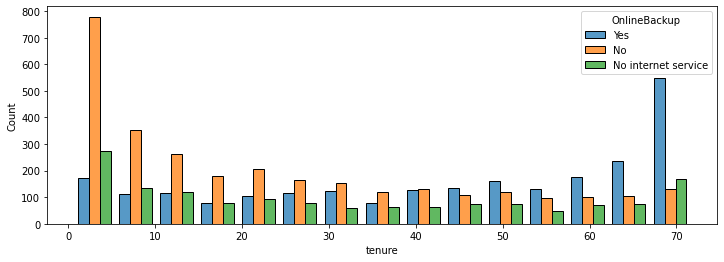

In [220]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['OnlineBackup'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

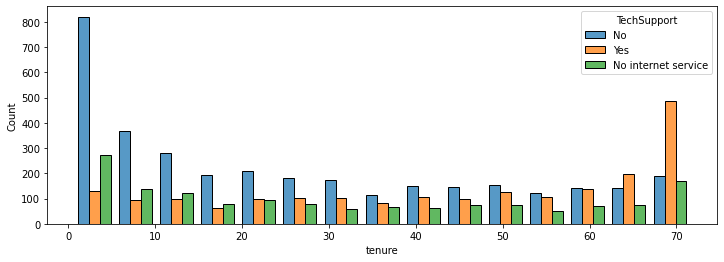

In [191]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['TechSupport'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

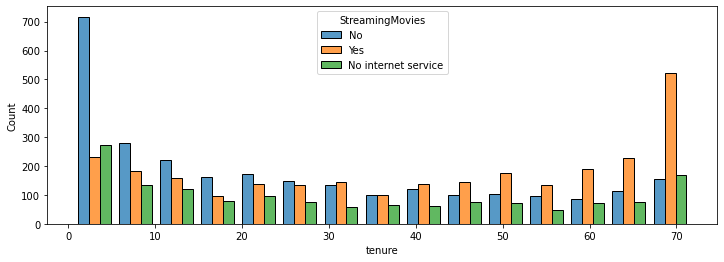

In [193]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['StreamingMovies'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

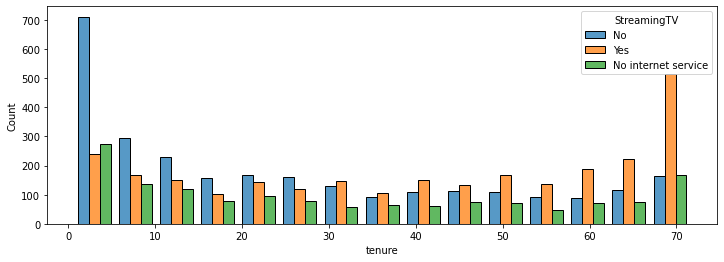

In [194]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['StreamingTV'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

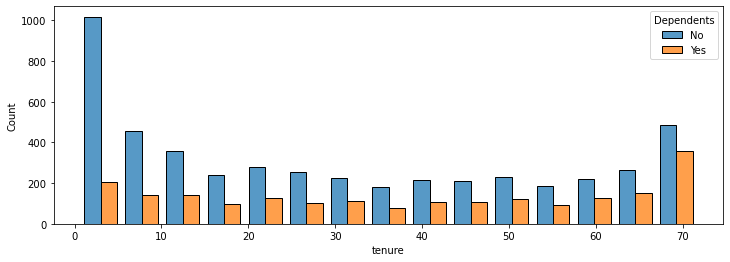

In [213]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['Dependents'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

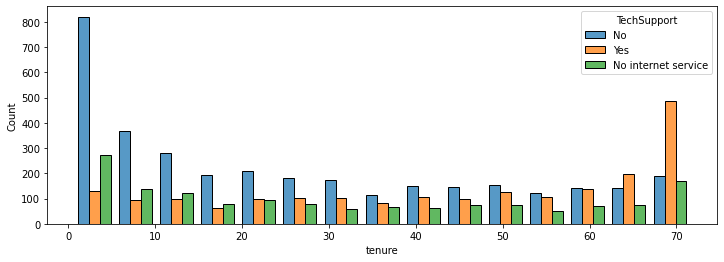

In [225]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['TechSupport'], multiple="dodge", shrink=.8)

## Most of the staying customer in the company have partners

<AxesSubplot:xlabel='tenure', ylabel='Count'>

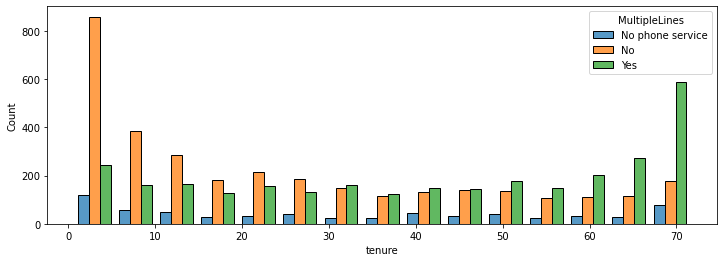

In [208]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['MultipleLines'], multiple="dodge", shrink=.8)

## The most of customer staying in company who have multiple lines

<AxesSubplot:xlabel='tenure', ylabel='Count'>

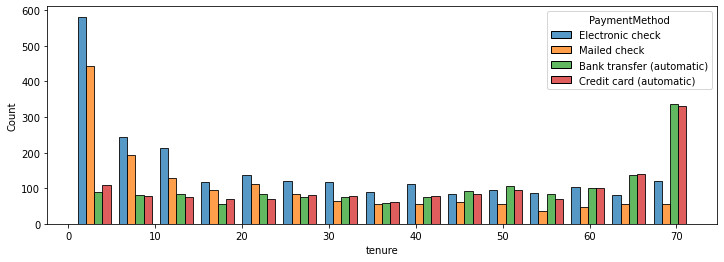

In [198]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['tenure'], hue=data['PaymentMethod'], multiple="dodge", shrink=.8)

## The customers who pay by Bank transfer and credit cards are the most customer are staying in company

<AxesSubplot:xlabel='InternetService', ylabel='Count'>

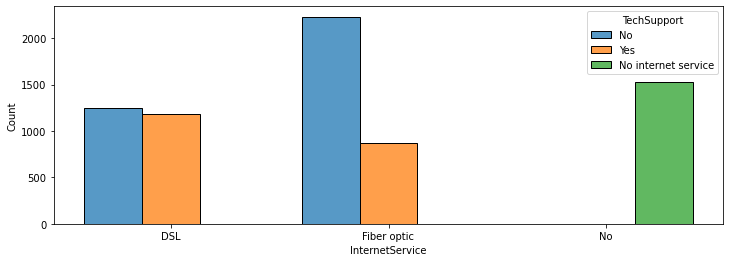

In [130]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['InternetService'], hue=data['TechSupport'], multiple="dodge", shrink=.8)

## Fiber optic service need more techSupport

<AxesSubplot:xlabel='gender', ylabel='Count'>

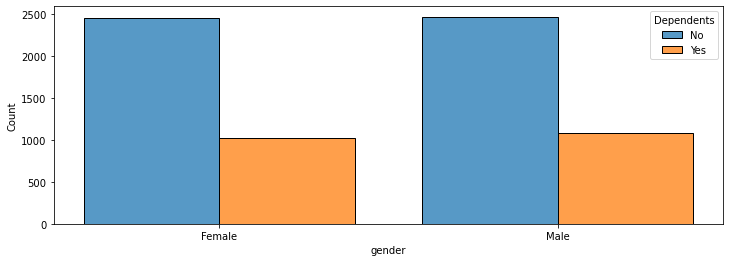

In [132]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['gender'], hue=data['Dependents'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Contract', ylabel='Count'>

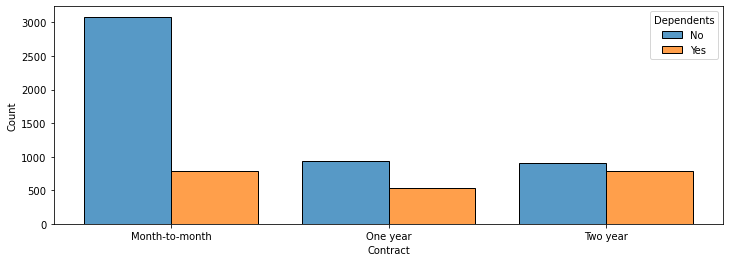

In [133]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['Contract'], hue=data['Dependents'], multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

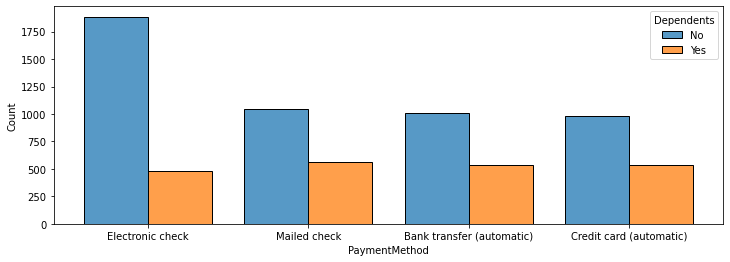

In [134]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x=data['PaymentMethod'], hue=data['Dependents'], multiple="dodge", shrink=.8)

## The number of dependents accounts are approximate equal for all payment methods

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

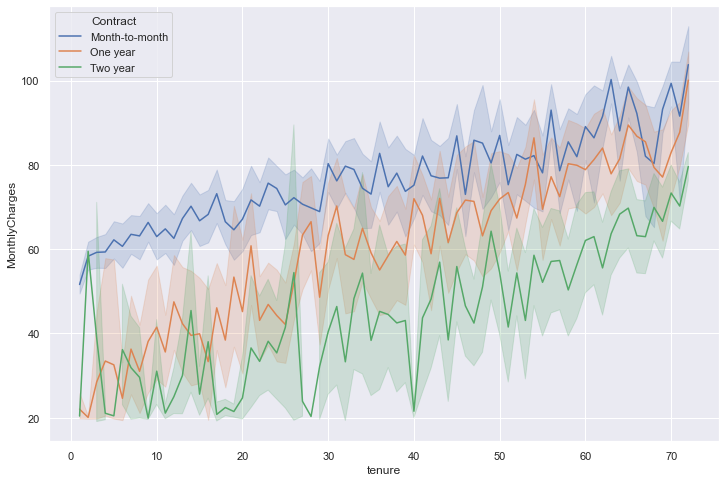

In [25]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['MonthlyCharges'],hue=data['Contract'])

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

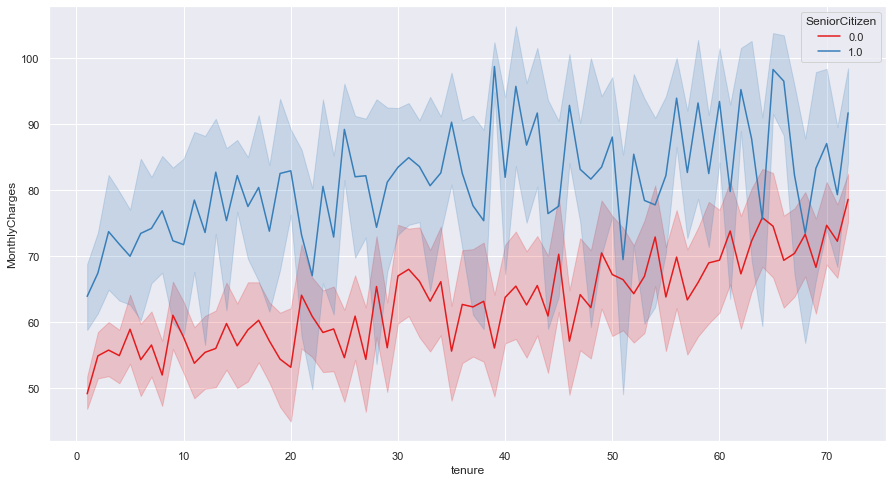

In [57]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['MonthlyCharges'],hue=data['SeniorCitizen'], palette = "Set1")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

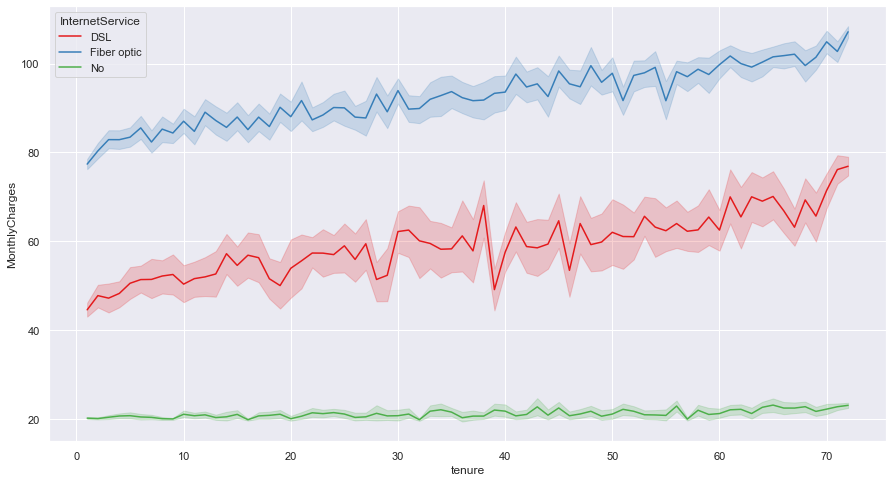

In [44]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['MonthlyCharges'],hue=data['InternetService'], palette = "Set1")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

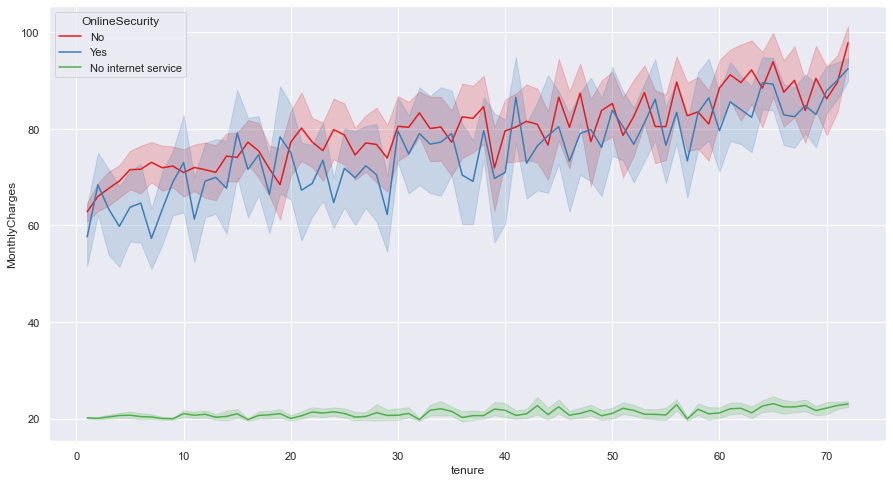

In [47]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['MonthlyCharges'],hue=data['OnlineSecurity'], palette = "Set1")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

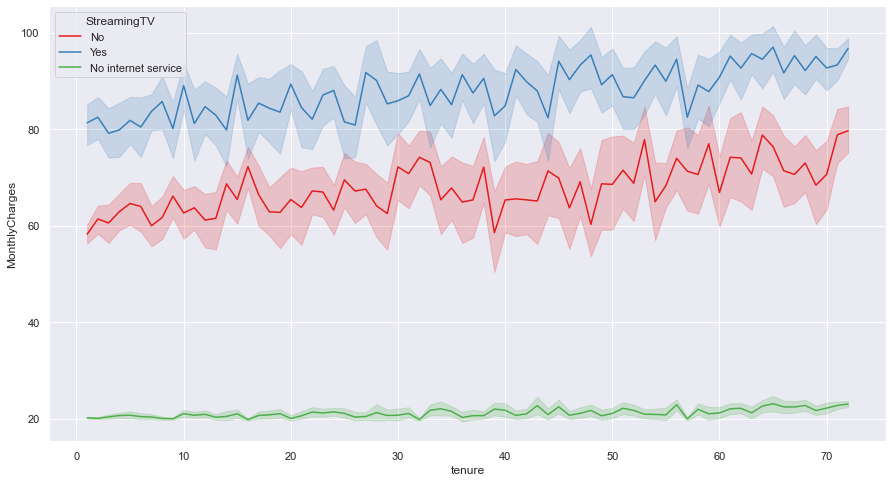

In [50]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['MonthlyCharges'],hue=data['StreamingTV'], palette = "Set1")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

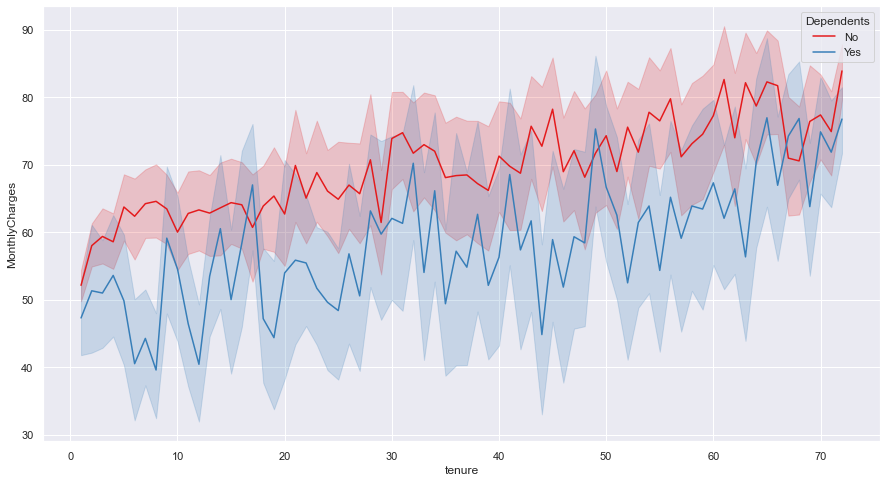

In [51]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['MonthlyCharges'],hue=data['Dependents'], palette = "Set1")

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

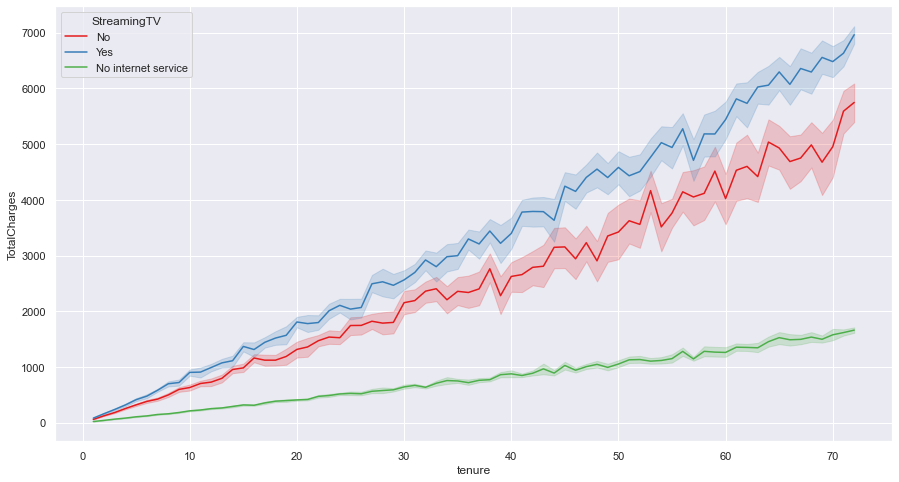

In [55]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['TotalCharges'],hue=data['StreamingTV'], palette = "Set1")

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

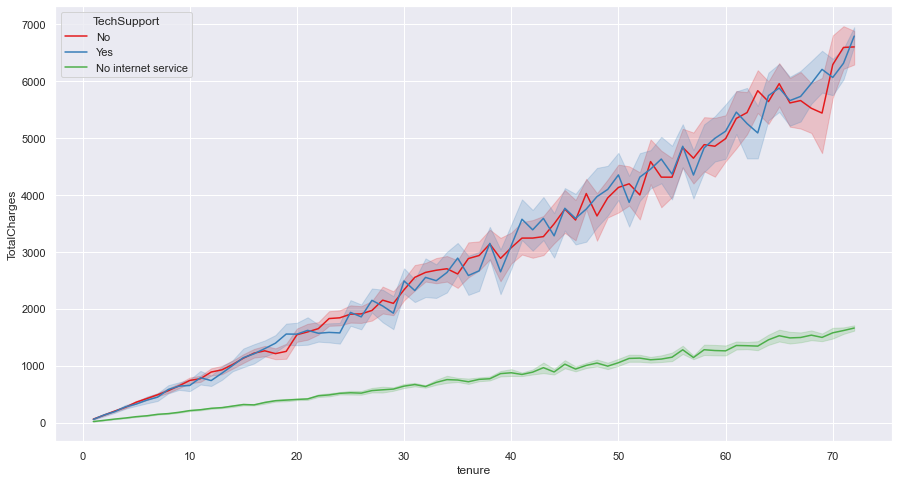

In [54]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=data, x=data['tenure'], y=data['TotalCharges'],hue=data['TechSupport'], palette = "Set1")

In [53]:
data.groupby(['Contract','InternetService']).sum()

SeniorCitizen   tenure  MonthlyCharges  \
Contract       InternetService                                           
Month-to-month DSL                      159.0  19191.0        61418.45   
               Fiber optic              636.0  45825.0       185181.10   
               No                        12.0   4744.0        10694.60   
One year       DSL                       50.0  23077.0        34996.15   
               Fiber optic              124.0  28081.0        53242.15   
               No                        16.0  10770.0         7578.30   
Two year       DSL                       50.0  37142.0        44250.75   
               Fiber optic               71.0  27964.0        44861.15   
               No                        24.0  31060.0        13893.95   

                                TotalCharges  
Contract       InternetService                
Month-to-month DSL                1015136.20  
               Fiber optic        4191552.55  
               No                   99172.75  
One year       DSL                1439990.85  
               Fiber optic        2800424.35  
               No                  228921.60  
Two year       DSL                2677700.30  
               Fiber optic        2931646.05  
               No                  696740.35

<AxesSubplot:xlabel='Contract,InternetService'>

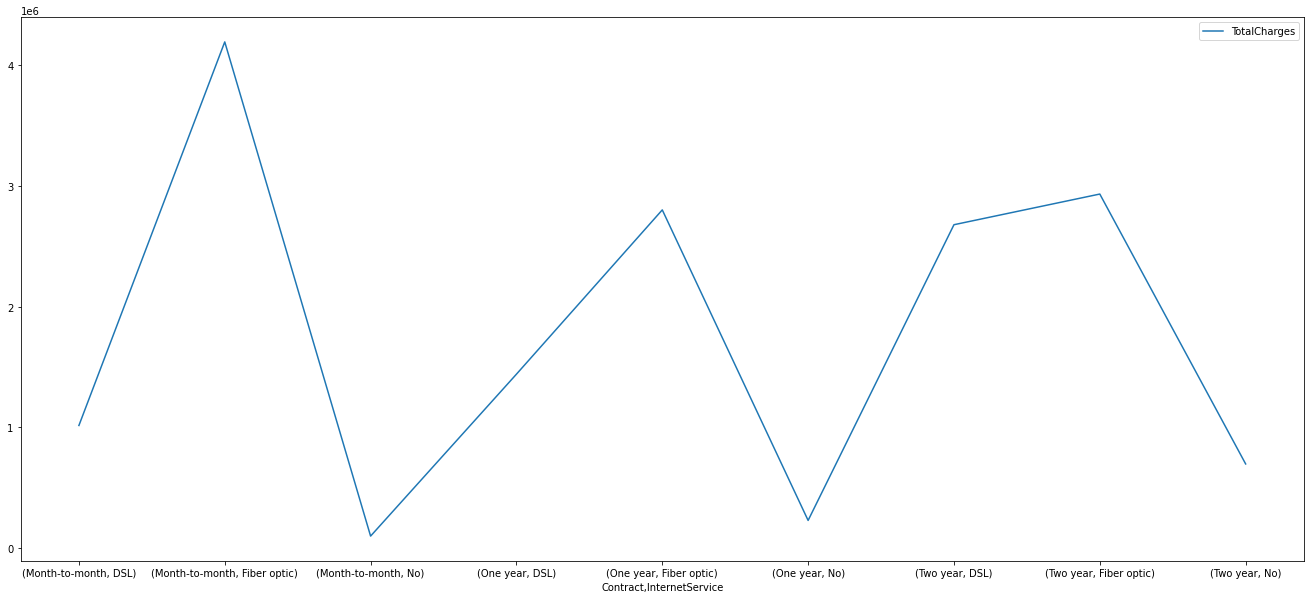

In [168]:
n=data.groupby(['Contract','InternetService']).sum().plot(y='TotalCharges',figsize=(23,10))
n

<AxesSubplot:xlabel='Contract,InternetService'>

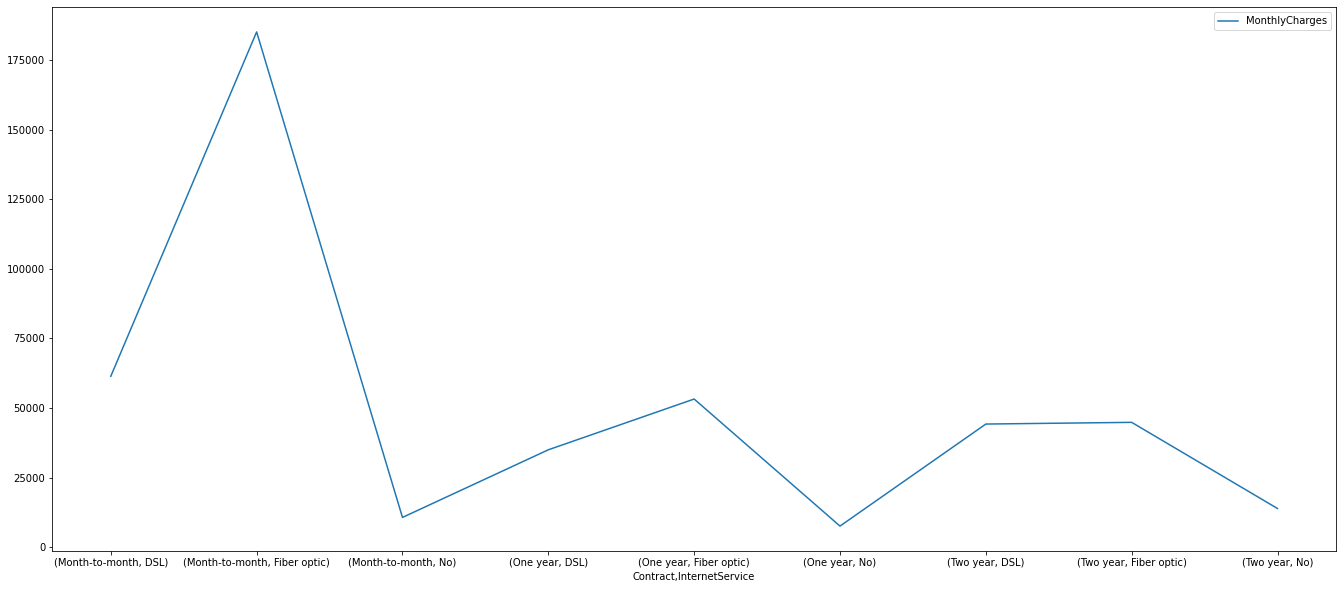

In [167]:
n=data.groupby(['Contract','InternetService']).sum().plot(y='MonthlyCharges',figsize=(23,10))
n

<AxesSubplot:xlabel='Contract,InternetService'>

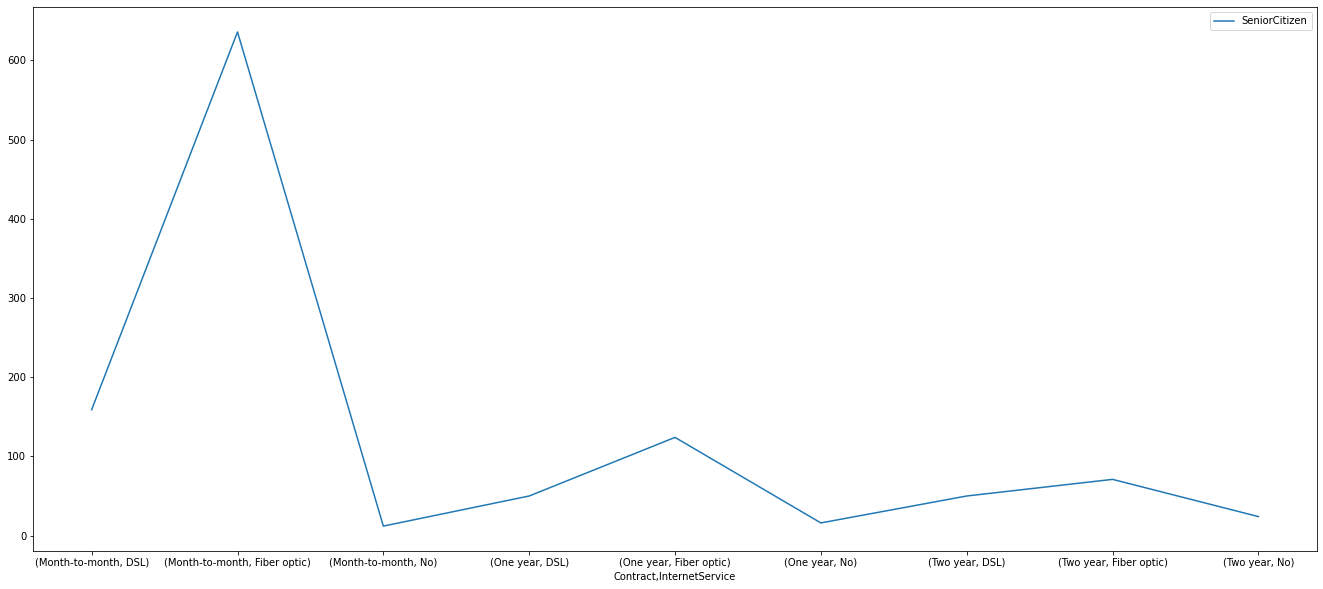

In [169]:
n=data.groupby(['Contract','InternetService']).sum().plot(y='SeniorCitizen',figsize=(23,10))
n

## Most of senior citizens are pay by month-to-month method with fibar optic as internit service

<AxesSubplot:xlabel='Contract,InternetService'>

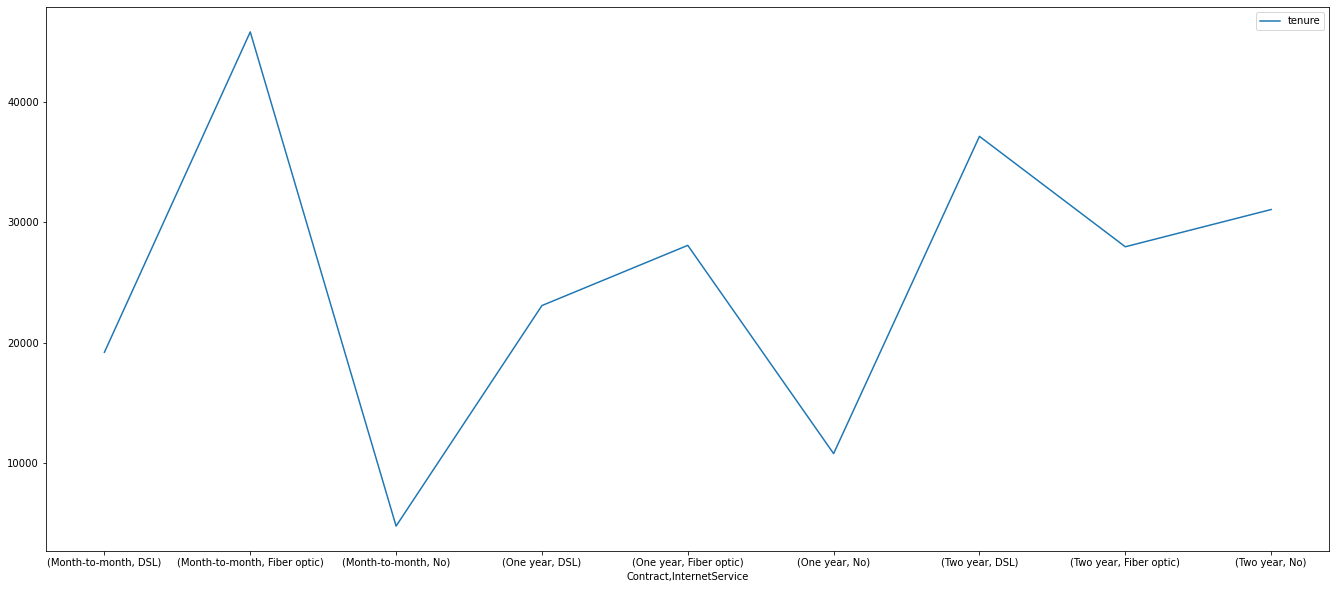

In [170]:
n=data.groupby(['Contract','InternetService']).sum().plot(y='tenure',figsize=(23,10))
n

<AxesSubplot:xlabel='gender,PaymentMethod'>

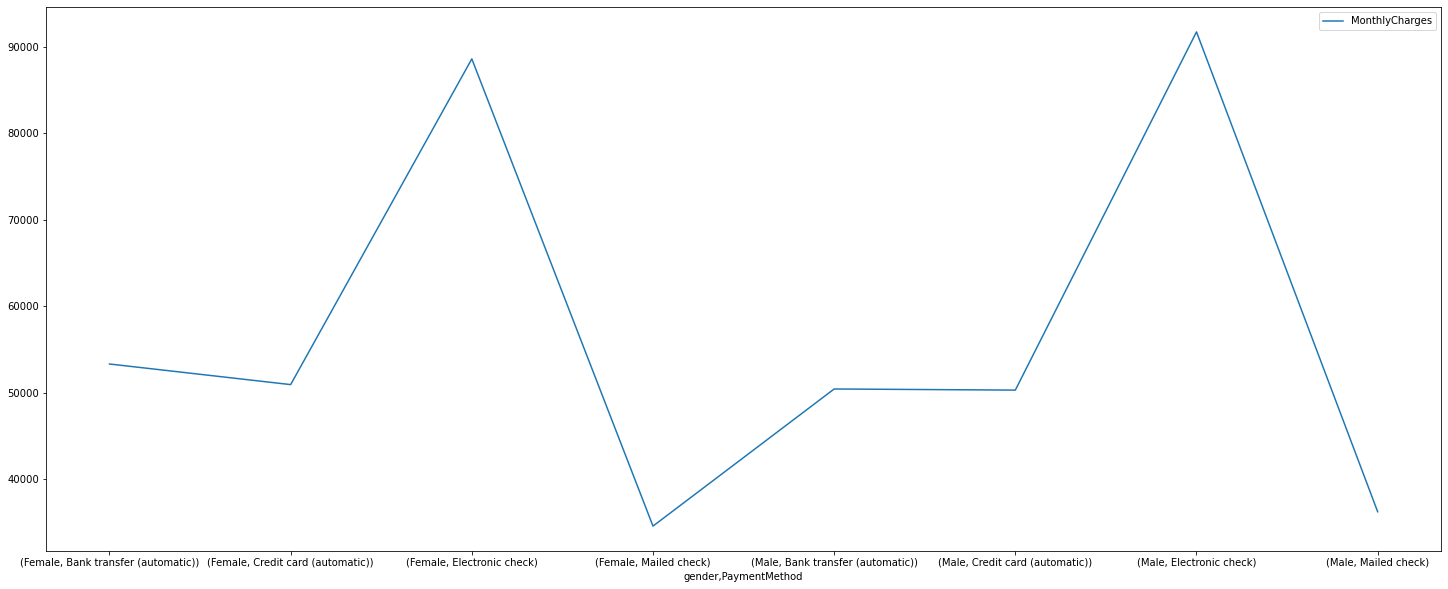

In [184]:
df=data.groupby(['gender','PaymentMethod']).sum().plot(y='MonthlyCharges',figsize=(25,10))
df

<AxesSubplot:xlabel='StreamingTV,StreamingMovies'>

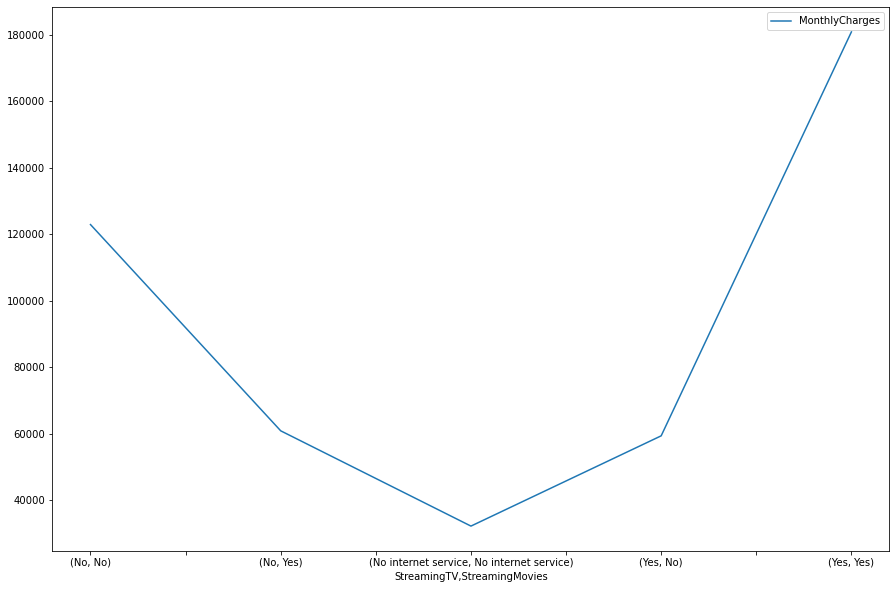

In [196]:
df=data.groupby(['StreamingTV','StreamingMovies']).sum().plot(y='MonthlyCharges',figsize=(15,10))
df

## The income from customers without both the streaming of tv and movies is more than the customers participant in only one of them

## Need to inhance the streaming services

<AxesSubplot:xlabel='PhoneService,InternetService'>

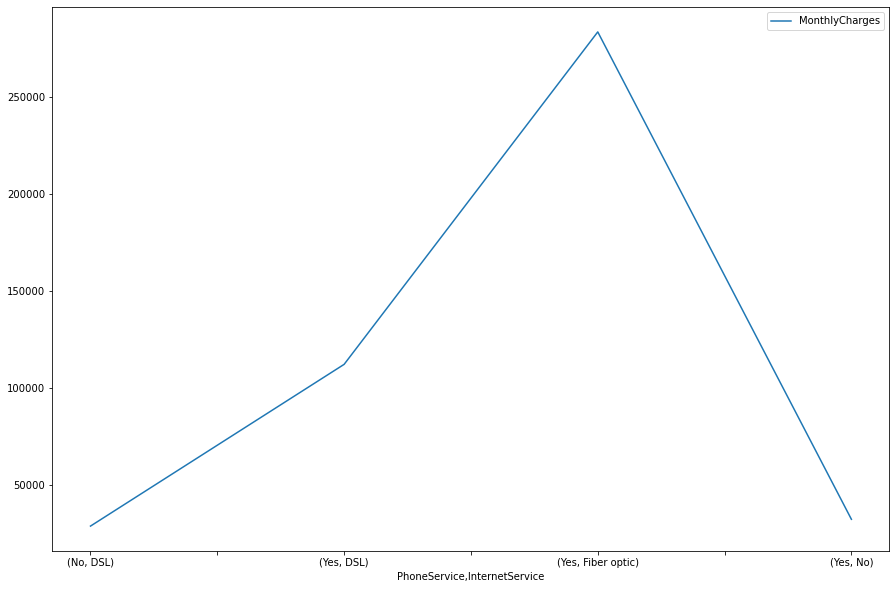

In [204]:
df=data.groupby(['PhoneService','InternetService']).sum().plot(y='MonthlyCharges',figsize=(15,10))
df

<AxesSubplot:xlabel='Partner,Dependents'>

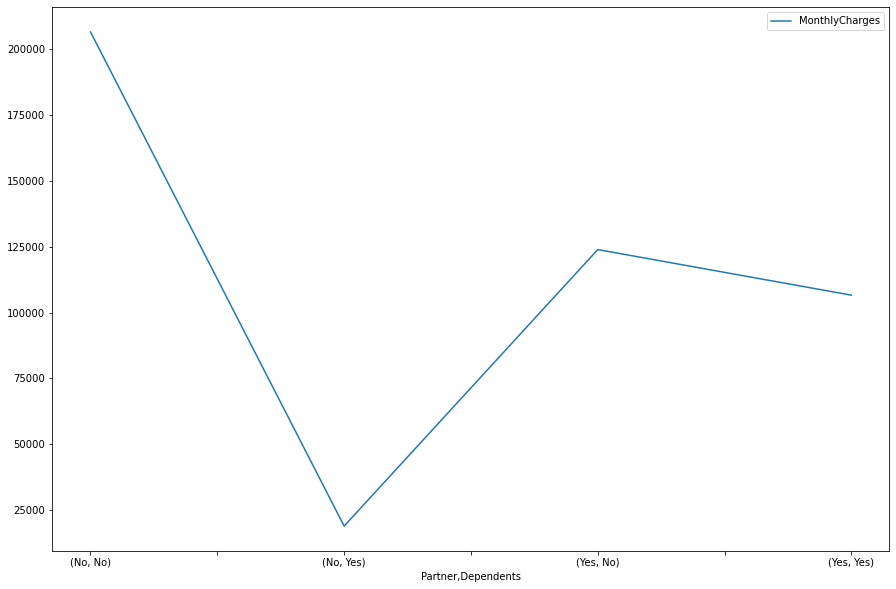

In [218]:
df=data.groupby(['Partner','Dependents']).sum().plot(y='MonthlyCharges',figsize=(15,10))
df

<AxesSubplot:xlabel='DeviceProtection,OnlineSecurity'>

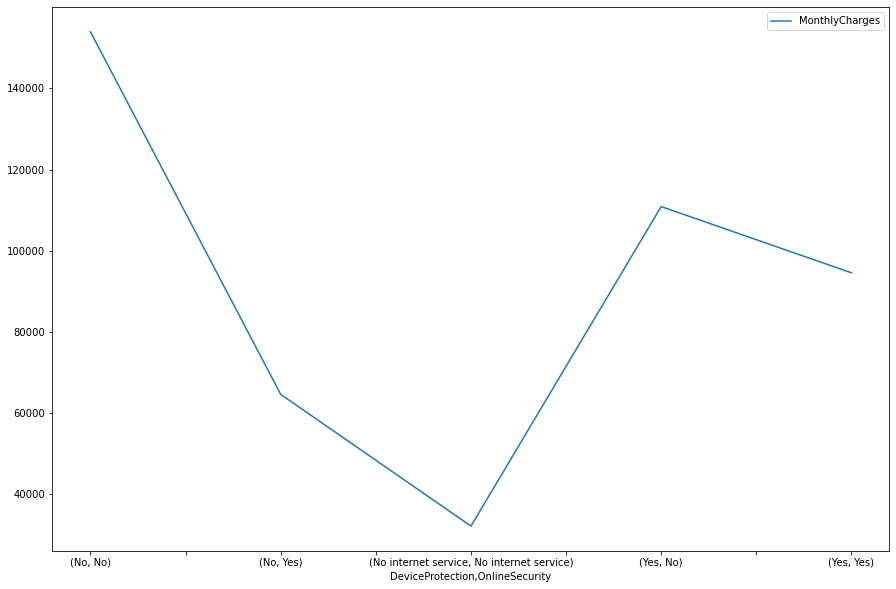

In [223]:
df=data.groupby(['DeviceProtection','OnlineSecurity']).sum().plot(y='MonthlyCharges',figsize=(15,10))
df

<AxesSubplot:xlabel='TechSupport'>

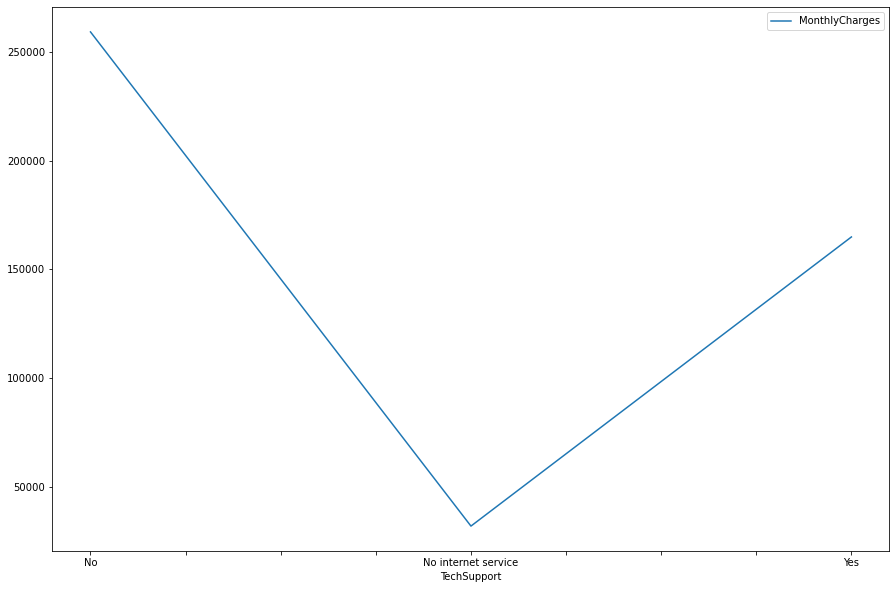

In [232]:
df=data.groupby(['TechSupport']).sum().plot(y='MonthlyCharges',figsize=(15,10))
df

<AxesSubplot:xlabel='TechSupport'>

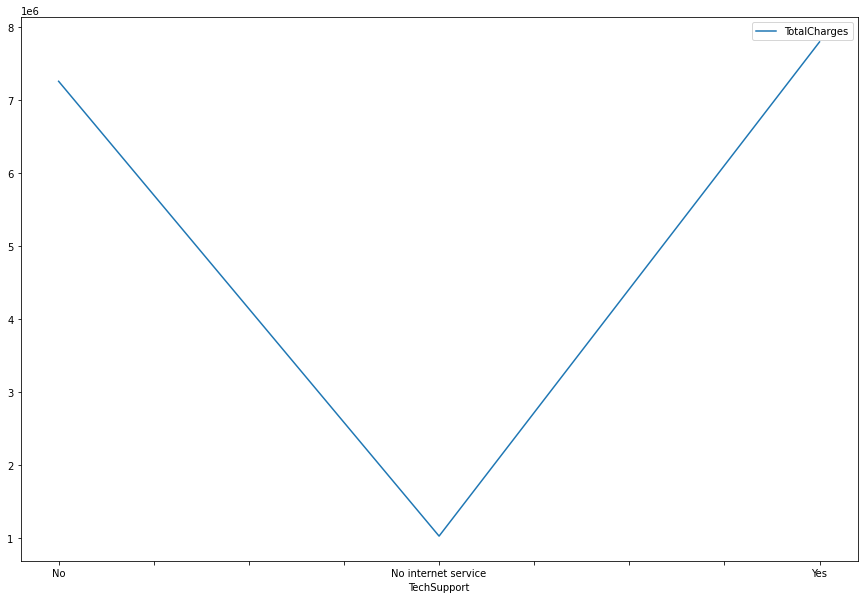

In [234]:
df=data.groupby(['TechSupport']).sum().plot(y='TotalCharges',figsize=(15,10))
df

# Conclusion

#### Most of the revenues are from customers contracting by Month-to-month method, using a fiber optic service and containg most of senior citizens.

#### However that the most income comes from customes paying by Electronic check, the most stable customer who stay in the company are the customers pay by Bank transfer and credit cards.

#### The customers who get the streaming services take the two (tv and movie) services or neither of the two.

#### All the fiber optic services has a phone services.

#### Most of the staying customer in the company have partners

#### Customers with no partner or dependents are the most value monthly charged.

#### The majorty of month-to-month contract has no online backup.

#### According to monthly revenue, the customer with no device protection or online security have the most monthly charged value.

#### Using Mailed check as payment method is has less probability for paper billing than any other method.

#### The income from customer with no tech support is higher than customer with tech support for monthly revenues, although the total revenue is higher for customer with tech support.